# Load data

In [1]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
import numpy as np
import plotly.graph_objects as go

data_path = './'

def clean_for_analysis(df):
    return df.dropna(subset=['MovieCountries'])

all_movies = pd.read_csv(data_path + 'all_movies.csv')
all_movies = clean_for_analysis(all_movies)
all_movies

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,MovieRating,MovieRatingNb,MoviePlot
0,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,"Short Film, Silent film, Indie, Black-and-white",5.4,215,After finding out that her father is suffering...
2,142995,The Story of the Kelly Gang,1906,NaN,70.0,English Language,Australia,"Crime Fiction, Silent film, Biography, Indie, ...",6.0,947,The Story of the Kelly Gangs tone is of sorrow...
3,4849466,L'Enfant prodigue,1907,NaN,90.0,French Language,France,"Short Film, Silent film, Drama",5.7,28,NaN
4,32986669,Robbery Under Arms,1907,NaN,NaN,Silent film,Australia,"Silent film, Drama",4.3,27,Key scenes of the film included the branding o...
5,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",5.2,78,NaN
...,...,...,...,...,...,...,...,...,...,...,...
44633,21216680,TN-07 AL 4777,2009,NaN,115.0,Tamil Language,India,"Thriller, Drama",7.2,35,NaN
44634,28032359,Love At Seventh Sight,2009,NaN,100.0,Mandarin Chinese,China,"Romantic drama, Romance Film, Drama, Chinese M...",5.5,11,NaN
44635,16794053,Quarantine,2008,41319906.0,89.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Zombie Film...",3.9,201,{{plot}} A television reporter named Angela Vi...
44636,12005,The Return of Godzilla,1984,4116395.0,103.0,"Japanese Language, Russian Language, English L...",Japan,"Science Fiction, Japanese Movies, Monster",6.8,2830,A Japanese fishing vessel is trying to find it...


In [2]:
adapted_movies = pd.read_csv(data_path + 'adapted_movies.csv')
adapted_movies = clean_for_analysis(adapted_movies)
adapted_movies

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,1900,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,1997,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,1912,1912,NaN,NaN,NaN,NaN,6.5,502,"Dr. Friedrich von Kammacher , a surgeon, is de..."
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,1820,1820,NaN,NaN,NaN,NaN,5.6,98,"Set in late 12th century England, this silent ..."
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,1697,1697,The former Well Loved Tales series have been r...,3.97,1937.0,eng,6.0,1100,Cinderella is a winsome young girl who lives w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,32621340,The Client,2011,15780280.0,122.0,Korean Language,South Korea,"Crime Fiction, Mystery, Thriller, Drama",John Grisham,The Client,1993,1993,NaN,4.01,378641.0,eng,6.8,2040,"On his wedding anniversary, Han Chul-min driv..."
2837,34647290,Love,2012,NaN,150.0,Standard Mandarin,"China, Taiwan","Romance Film, Drama",Leo Tolstoy,Anna Karenina,1873-1887,1873-1887,NaN,4.05,631550.0,eng,6.5,1668,NaN
2838,35020822,Helpless,2012,16175929.0,117.0,Korean Language,South Korea,"Thriller, Mystery",Miyuki Miyabe,All She Was Worth,1992,1992,Here is a deftly written thriller that is also...,3.69,2921.0,NaN,6.7,2662,"South Korea, 2009. A few days before their wed..."
2839,34956831,Nightmare,2011,NaN,NaN,Mandarin Chinese,China,Horror,Cornell Woolrich,Nightmare,1942,1942,NaN,NaN,NaN,NaN,5.7,21,NaN


In [3]:
import sys
sys.path.append('scripts/')
from country_name_to_ISO import *

countries_col = 'countries_iso'

def df_to_country_ISO(df):
    df = df.dropna(subset=['MovieCountries'])
    iso = df['MovieCountries'].map(lambda x : ','.join(
        map(lambda y : country_to_iso_code(y.strip()),
            x.split(','))
    ))
    df[countries_col] = iso
    return df
all_movies = df_to_country_ISO(all_movies)
all_movies

no code for <Crime>
no code for <Malayalam Language>


,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,MovieRating,MovieRatingNb,MoviePlot,countries_iso
0,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,"Short Film, Silent film, Indie, Black-and-white",5.4,215,After finding out that her father is suffering...,USA
2,142995,The Story of the Kelly Gang,1906,NaN,70.0,English Language,Australia,"Crime Fiction, Silent film, Biography, Indie, ...",6.0,947,The Story of the Kelly Gangs tone is of sorrow...,AUS
3,4849466,L'Enfant prodigue,1907,NaN,90.0,French Language,France,"Short Film, Silent film, Drama",5.7,28,NaN,FRA
4,32986669,Robbery Under Arms,1907,NaN,NaN,Silent film,Australia,"Silent film, Drama",4.3,27,Key scenes of the film included the branding o...,AUS
5,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",5.2,78,NaN,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
44633,21216680,TN-07 AL 4777,2009,NaN,115.0,Tamil Language,India,"Thriller, Drama",7.2,35,NaN,IND
44634,28032359,Love At Seventh Sight,2009,NaN,100.0,Mandarin Chinese,China,"Romantic drama, Romance Film, Drama, Chinese M...",5.5,11,NaN,CHN
44635,16794053,Quarantine,2008,41319906.0,89.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Zombie Film...",3.9,201,{{plot}} A television reporter named Angela Vi...,USA
44636,12005,The Return of Godzilla,1984,4116395.0,103.0,"Japanese Language, Russian Language, English L...",Japan,"Science Fiction, Japanese Movies, Monster",6.8,2830,A Japanese fishing vessel is trying to find it...,JPN


In [4]:
adapted_movies = df_to_country_ISO(adapted_movies)
adapted_movies

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot,countries_iso
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,1900,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN,USA
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,1997,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,USA
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,1912,1912,NaN,NaN,NaN,NaN,6.5,502,"Dr. Friedrich von Kammacher , a surgeon, is de...",DNK
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,1820,1820,NaN,NaN,NaN,NaN,5.6,98,"Set in late 12th century England, this silent ...",USA
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,1697,1697,The former Well Loved Tales series have been r...,3.97,1937.0,eng,6.0,1100,Cinderella is a winsome young girl who lives w...,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,32621340,The Client,2011,15780280.0,122.0,Korean Language,South Korea,"Crime Fiction, Mystery, Thriller, Drama",John Grisham,The Client,1993,1993,NaN,4.01,378641.0,eng,6.8,2040,"On his wedding anniversary, Han Chul-min driv...",KOR
2837,34647290,Love,2012,NaN,150.0,Standard Mandarin,"China, Taiwan","Romance Film, Drama",Leo Tolstoy,Anna Karenina,1873-1887,1873-1887,NaN,4.05,631550.0,eng,6.5,1668,NaN,"CHN,TWN"
2838,35020822,Helpless,2012,16175929.0,117.0,Korean Language,South Korea,"Thriller, Mystery",Miyuki Miyabe,All She Was Worth,1992,1992,Here is a deftly written thriller that is also...,3.69,2921.0,NaN,6.7,2662,"South Korea, 2009. A few days before their wed...",KOR
2839,34956831,Nightmare,2011,NaN,NaN,Mandarin Chinese,China,Horror,Cornell Woolrich,Nightmare,1942,1942,NaN,NaN,NaN,NaN,5.7,21,NaN,CHN


In [5]:
# extracts the unique values of a series of string by splitting them using ',' and flattening the result
def extract_unique_countries(data):
    split_countries = data.dropna().str.split(',')
    flattened = [item.strip() for sublist in split_countries for item in sublist]
    return pd.unique(flattened)

countries = pd.Series(extract_unique_countries(all_movies[countries_col])).to_frame("country")
countries = countries[countries['country'] != ""]
countries.sort_values(by='country', inplace=True)
countries

/var/folders/3l/lf0cbhr12ll4mhw4j6zhhzr80000gn/T/ipykernel_73917/408728514.py:5: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(flattened)


,country
89,ABW
76,AFG
86,ALB
96,ARE
12,ARG
...,...
94,VNM
30,YUV
37,ZAF
102,ZMB


In [6]:
def country_to_col(country):
    return "from_" + country.replace(' ', '_')

def one_hot_encode_country(df, country):
    return df[countries_col].map(lambda x: country in x).to_frame(country_to_col(country))

def one_hot_encode_countries(df, countries):
    df = df.copy()
    for country in countries:
        oh = one_hot_encode_country(df, country)
        df = pd.concat([df, oh], axis=1)
    return df

all_movies_oh_countries = one_hot_encode_countries(all_movies, countries['country'])
all_movies_oh_countries

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,MovieRating,MovieRatingNb,...,from_UKR,from_URY,from_USA,from_UZB,from_VEN,from_VNM,from_YUV,from_ZAF,from_ZMB,from_ZWE
0,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,"Short Film, Silent film, Indie, Black-and-white",5.4,215,...,False,False,True,False,False,False,False,False,False,False
2,142995,The Story of the Kelly Gang,1906,NaN,70.0,English Language,Australia,"Crime Fiction, Silent film, Biography, Indie, ...",6.0,947,...,False,False,False,False,False,False,False,False,False,False
3,4849466,L'Enfant prodigue,1907,NaN,90.0,French Language,France,"Short Film, Silent film, Drama",5.7,28,...,False,False,False,False,False,False,False,False,False,False
4,32986669,Robbery Under Arms,1907,NaN,NaN,Silent film,Australia,"Silent film, Drama",4.3,27,...,False,False,False,False,False,False,False,False,False,False
5,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",5.2,78,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,21216680,TN-07 AL 4777,2009,NaN,115.0,Tamil Language,India,"Thriller, Drama",7.2,35,...,False,False,False,False,False,False,False,False,False,False
44634,28032359,Love At Seventh Sight,2009,NaN,100.0,Mandarin Chinese,China,"Romantic drama, Romance Film, Drama, Chinese M...",5.5,11,...,False,False,False,False,False,False,False,False,False,False
44635,16794053,Quarantine,2008,41319906.0,89.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Zombie Film...",3.9,201,...,False,False,True,False,False,False,False,False,False,False
44636,12005,The Return of Godzilla,1984,4116395.0,103.0,"Japanese Language, Russian Language, English L...",Japan,"Science Fiction, Japanese Movies, Monster",6.8,2830,...,False,False,False,False,False,False,False,False,False,False


In [7]:
adapted_movies_oh_countries = one_hot_encode_countries(adapted_movies, countries['country'])
adapted_movies_oh_countries

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,...,from_UKR,from_URY,from_USA,from_UZB,from_VEN,from_VNM,from_YUV,from_ZAF,from_ZMB,from_ZWE
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,...,False,False,True,False,False,False,False,False,False,False
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,...,False,False,True,False,False,False,False,False,False,False
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,...,False,False,False,False,False,False,False,False,False,False
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,...,False,False,True,False,False,False,False,False,False,False
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,32621340,The Client,2011,15780280.0,122.0,Korean Language,South Korea,"Crime Fiction, Mystery, Thriller, Drama",John Grisham,The Client,...,False,False,False,False,False,False,False,False,False,False
2837,34647290,Love,2012,NaN,150.0,Standard Mandarin,"China, Taiwan","Romance Film, Drama",Leo Tolstoy,Anna Karenina,...,False,False,False,False,False,False,False,False,False,False
2838,35020822,Helpless,2012,16175929.0,117.0,Korean Language,South Korea,"Thriller, Mystery",Miyuki Miyabe,All She Was Worth,...,False,False,False,False,False,False,False,False,False,False
2839,34956831,Nightmare,2011,NaN,NaN,Mandarin Chinese,China,Horror,Cornell Woolrich,Nightmare,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Daframe that will hold our insights per countries
def add_country_name(df):
    df = df.copy()
    df['country_name'] = df['country'].map(lambda x : iso_to_country(x))
    return df
all_movies_per_country_stats = add_country_name(countries)
adapted_movies_per_country_stats = all_movies_per_country_stats.copy()
adapted_movies_per_country_stats

no country for <COD>


,country,country_name
89,ABW,Aruba
76,AFG,Afghanistan
86,ALB,Albania
96,ARE,United Arab Emirates
12,ARG,Argentina
...,...,...
94,VNM,Vietnam
30,YUV,Yugoslavia
37,ZAF,South Africa
102,ZMB,Zambia


In [9]:
def count_movies(df, country_stats):
    count = country_stats['country'].map(lambda country : np.sum(df[country_to_col(country)]))
    country_stats['movie_count'] = count
    return country_stats

all_movies_per_country_stats = count_movies(all_movies_oh_countries, all_movies_per_country_stats)
all_movies_per_country_stats

adapted_movies_per_country_stats = count_movies(adapted_movies_oh_countries, adapted_movies_per_country_stats)
adapted_movies_per_country_stats

,country,country_name,movie_count
89,ABW,Aruba,0
76,AFG,Afghanistan,0
86,ALB,Albania,1
96,ARE,United Arab Emirates,2
12,ARG,Argentina,4
...,...,...,...
94,VNM,Vietnam,0
30,YUV,Yugoslavia,4
37,ZAF,South Africa,4
102,ZMB,Zambia,0


In [30]:
def average_per_country(df, stats, col, name):
    average = stats['country'].map(lambda country : np.mean(df[col][df[country_to_col(country)]]))
    stats[name] = average
    return stats

average_per_country(all_movies_oh_countries, all_movies_per_country_stats, 'MovieRuntime', 'runtime')
average_per_country(adapted_movies_oh_countries, adapted_movies_per_country_stats, 'MovieRuntime', 'runtime')

average_per_country(all_movies_oh_countries, all_movies_per_country_stats, 'MovieRating', 'rating')
average_per_country(adapted_movies_oh_countries, adapted_movies_per_country_stats, 'MovieRating', 'rating')

average_per_country(all_movies_oh_countries, all_movies_per_country_stats, 'MovieRatingNb', 'nb_ratings')
average_per_country(adapted_movies_oh_countries, adapted_movies_per_country_stats, 'MovieRatingNb', 'nb_ratings')

adapted_movies_per_country_stats

,country,country_name,movie_count,runtime,rating,nb_ratingss,nb_ratings
89,ABW,Aruba,0,NaN,NaN,NaN,NaN
76,AFG,Afghanistan,0,NaN,NaN,NaN,NaN
86,ALB,Albania,1,173.00,7.600,7593.00,7593.00
96,ARE,United Arab Emirates,2,126.50,7.450,278014.00,278014.00
12,ARG,Argentina,4,97.00,6.875,184.75,184.75
...,...,...,...,...,...,...,...
94,VNM,Vietnam,0,NaN,NaN,NaN,NaN
30,YUV,Yugoslavia,4,131.50,7.425,11219.75,11219.75
37,ZAF,South Africa,4,95.25,4.275,4446.25,4446.25
102,ZMB,Zambia,0,NaN,NaN,NaN,NaN


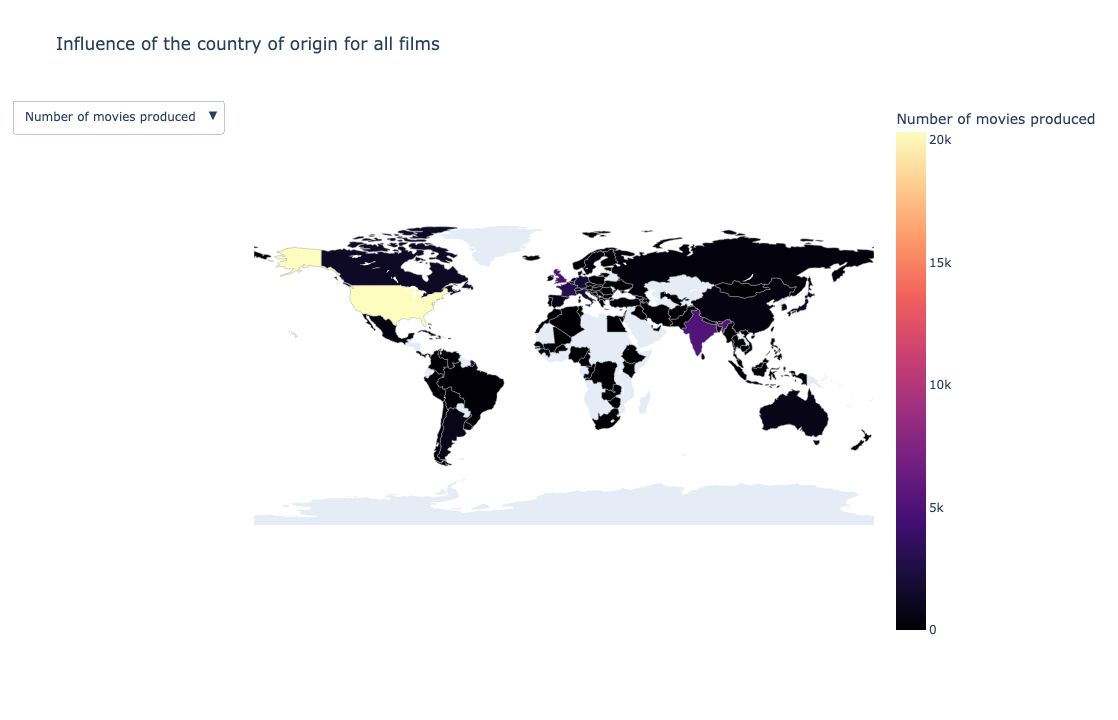

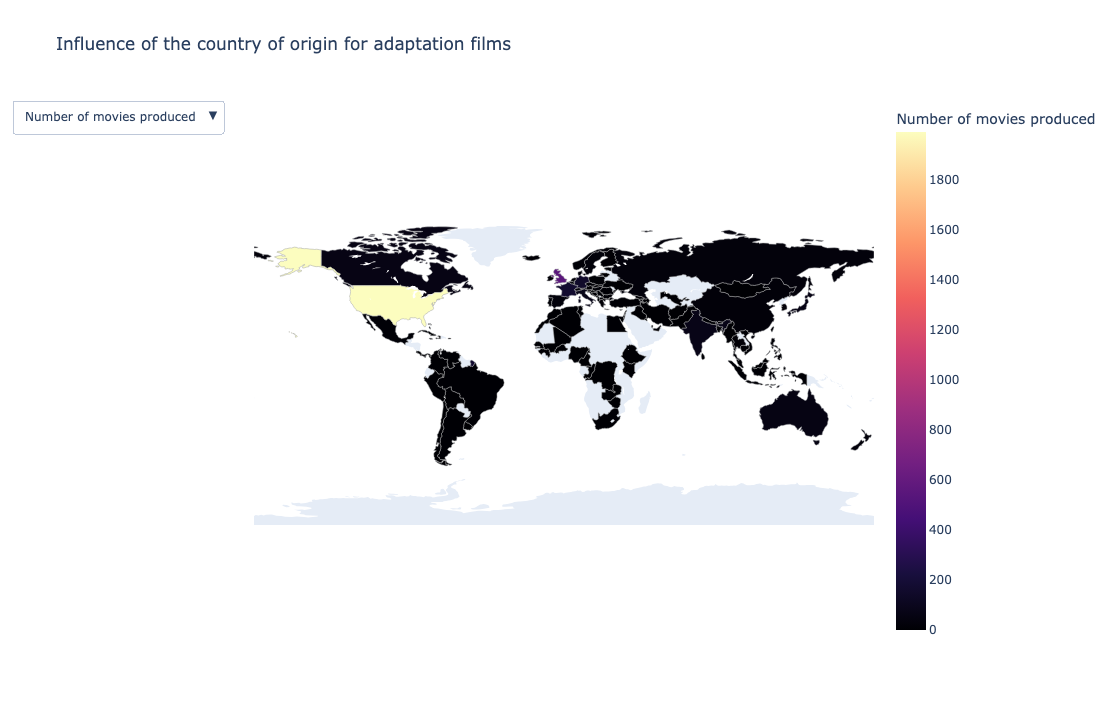

In [71]:
def worldmap_plot(title, df, columns, options, zmin, zmax, file):
    n_cols = len(columns)

    toString = lambda x : str(x)
    floatToString = lambda x : "{:.2f}".format(x)
    
    hoverText = df['country_name'] + '<br>' + \
    'Number of movies produced: ' + df['movie_count'].map(toString)  + '<br>' + ' Average runtime: ' + df['runtime'].map(floatToString) + '<br>' + \
    'Average rating: ' + df['rating'].map(floatToString)  + '<br>' + ' Average number of reviews: ' + df['nb_ratings'].map(floatToString)
    
    fig = go.Figure()
    for i in range(n_cols):
        f = go.Choropleth(
            locations = df['country'],
            z = df[columns[i]],
            text=hoverText,
            colorscale = 'magma',
            autocolorscale=False,
            marker_line_color='darkgray',
            marker_line_width=0.5,
            colorbar_title = options[i],
            visible = False,
        )
        
        if i > 0:
            f.zmax=zmax[i]
            f.zmin=zmin[i]
            
        fig.add_trace(f)
    fig.data[0].visible = True

    buttons = []
    for i in range(n_cols):
        button = dict(label=options[i],
                      method="update",
                      args=[{"visible": [i == j for j in range(n_cols)]}])
        buttons.append(button)
    
    fig.update_layout(
        title_text=title,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        width=1120,
        height=720,
        updatemenus=[
            dict(
                active=0,
                buttons=buttons,
            )
        ],
    )
    
    fig.show()
    pio.write_html(fig, file=file)

worldmap_cols = ['movie_count', 'runtime', 'rating', 'nb_ratings']
worldmap_options = ['Number of movies produced', 'Average runtime', 'Average rating', 'Average number of reviews']
zmax = [20_000, 150, 8, 260_000]
zmin = [0, 70, 0, 0]

worldmap_plot('Influence of the country of origin for all films', all_movies_per_country_stats,
              worldmap_cols, worldmap_options, zmin, zmax, "worldmap_all_films.html")
worldmap_plot('Influence of the country of origin for adaptation films', adapted_movies_per_country_stats,
              worldmap_cols, worldmap_options, zmin, zmax, "worldmap_adaption_films.html")